## Preliminaries

In [87]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

In [48]:
# Load in datasets
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_red_ev = df_red.loc[:, df_red.columns != 'quality']
df_white_ev = df_white.loc[:, df_white.columns != 'quality']
df_red_quality = df_red.loc[:, df_red.columns == 'quality']
df_white_quality = df_white.loc[:, df_white.columns == 'quality']

## Question 1

In [49]:
# Heatmap of pearson correlation matrix
df_red_ev.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [50]:
df_white_ev.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


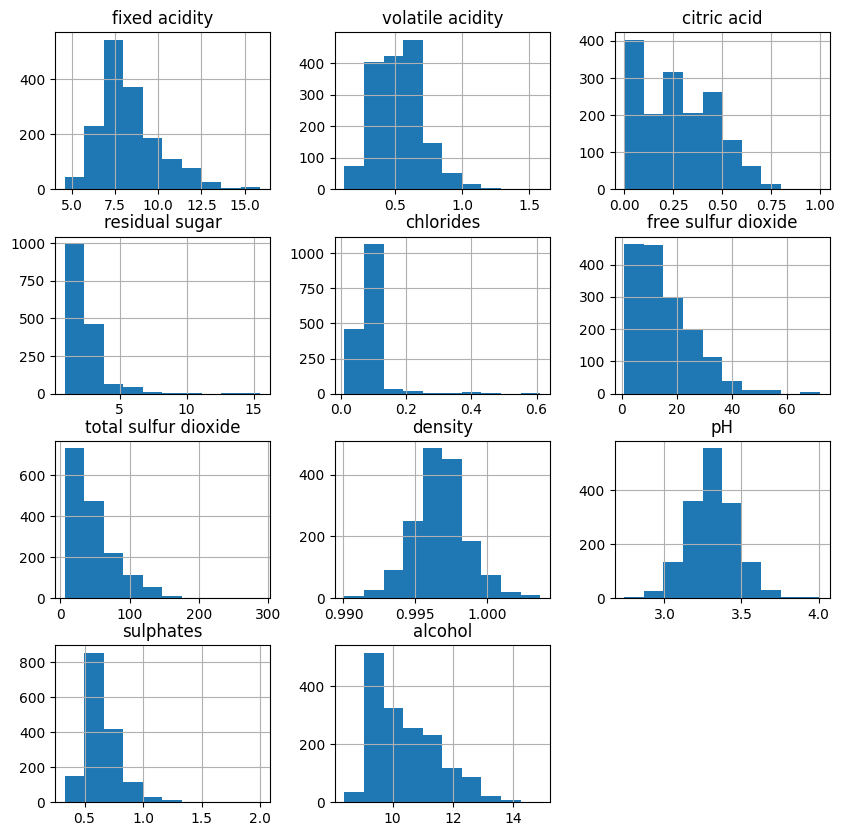

In [51]:
# Histogram of numerical features
df_red_ev.hist(figsize=(10,10))
plt.show()

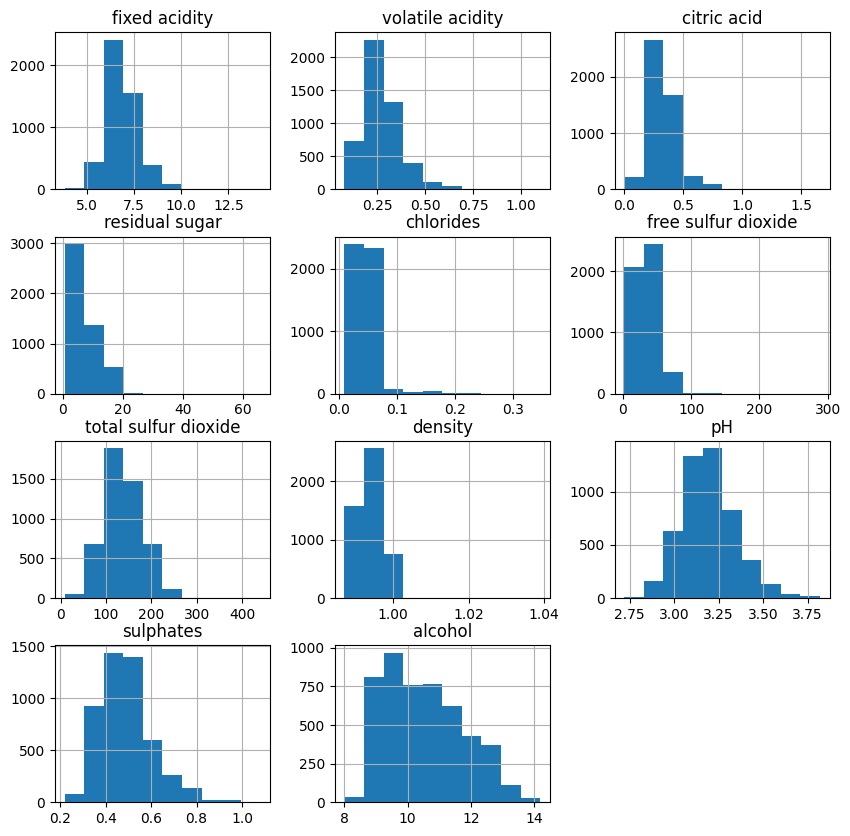

In [52]:
# Histogram of numerical features
df_white_ev.hist(figsize=(10,10))
plt.show()

In [53]:
# TA: No categorical features in this dataset for question 1.3
# TA: Should everything be combined in one dataset or can we have two sets of figures, one for red and one for white

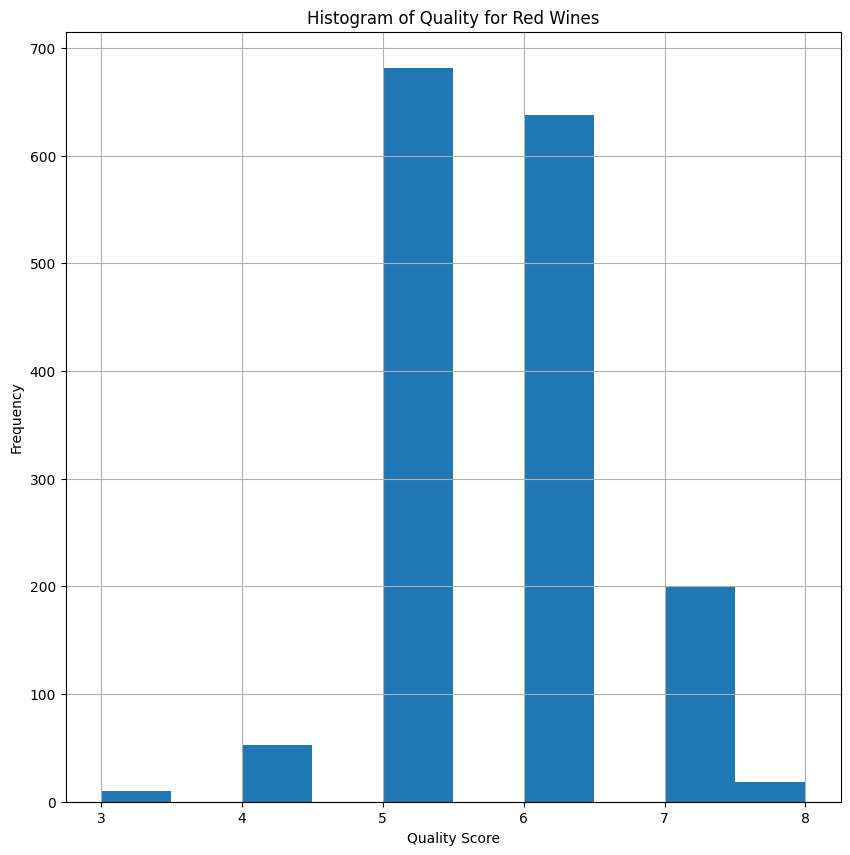

In [54]:
# Histogram of quality scores
df_red_quality.hist(figsize=(10,10))
plt.title("Histogram of Quality for Red Wines")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.show()

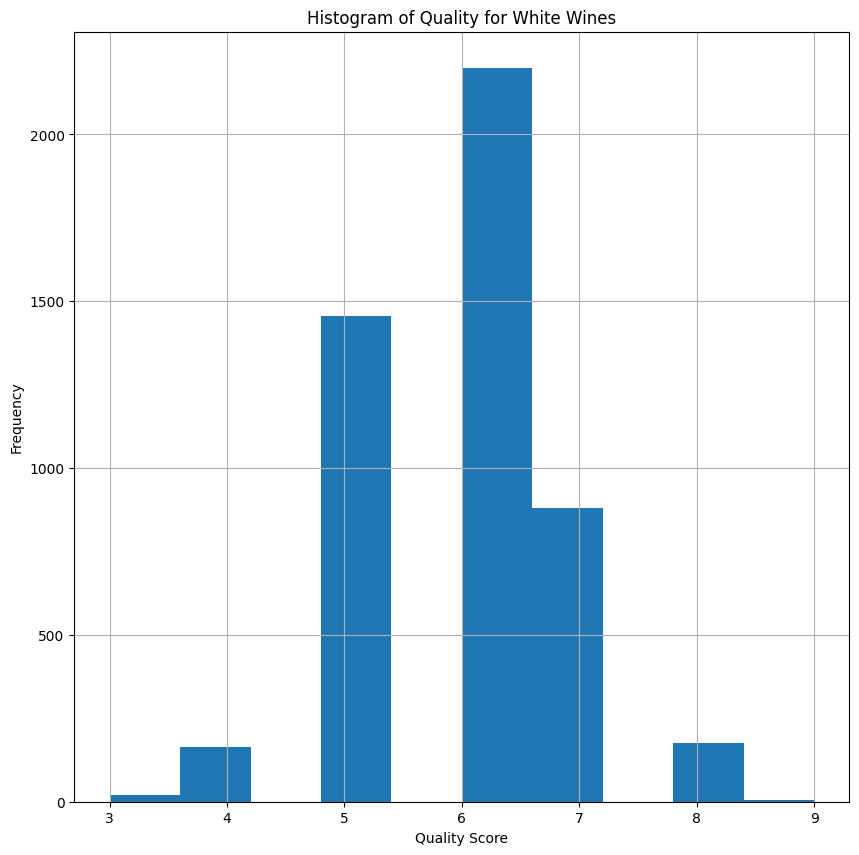

In [55]:
# Histogram of quality scores
df_white_quality.hist(figsize=(10,10))
plt.title("Histogram of Quality for White Wines")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.show()

## Question 2

In [56]:
# Standardize features
df_red_ev_scaled = scaler.fit_transform(df_red_ev)
df_white_ev_scaled = scaler.fit_transform(df_white_ev)

# TA: How to answer question 2.1 in text? Should we just report code?

In [57]:
# Select features based on mutual information regression
mi_scores_red = mutual_info_regression(df_red_ev_scaled, df_red_quality)
mi_scores_red = pd.Series(mi_scores_red, index=df_red_ev.columns)
mi_scores_red.sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
alcohol,0.185818
volatile acidity,0.108844
density,0.105198
sulphates,0.089733
total sulfur dioxide,0.083602
fixed acidity,0.065981
citric acid,0.055922
chlorides,0.040622
free sulfur dioxide,0.029925
residual sugar,0.000000


In [58]:
# Select features based on mutual information regression
mi_scores_white = mutual_info_regression(df_white_ev_scaled, df_white_quality)
mi_scores_white = pd.Series(mi_scores_white, index=df_white_ev.columns)
mi_scores_white.sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
density,0.180423
alcohol,0.143295
total sulfur dioxide,0.096263
residual sugar,0.081532
volatile acidity,0.058090
free sulfur dioxide,0.052524
citric acid,0.046548
chlorides,0.042165
fixed acidity,0.024485
pH,0.024112


In [59]:
# Use f regression
f_scores_red = f_regression(df_red_ev_scaled, df_red_quality)
f_scores_red = pd.Series(f_scores_red[0], index=df_red_ev.columns)
f_scores_red.sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
alcohol,468.267011
volatile acidity,287.444450
sulphates,107.740433
citric acid,86.257726
total sulfur dioxide,56.657818
density,50.405223
chlorides,26.985608
fixed acidity,24.960038
pH,5.340462
free sulfur dioxide,4.108502


In [60]:
# Use f regression
f_scores_white = f_regression(df_white_ev_scaled, df_white_quality)
f_scores_white = pd.Series(f_scores_white[0], index=df_white_ev.columns)
f_scores_white.sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
alcohol,1146.395496
density,509.911101
chlorides,225.727097
volatile acidity,192.958204
total sulfur dioxide,154.198182
fixed acidity,64.080465
pH,48.884022
residual sugar,47.064087
sulphates,14.147680
citric acid,0.415252


## Question 3

TA: Questions missing in problem statement

## Question 4

In [ ]:
# TA: Question 4.1
# Can this be answered qualitatively (i.e. lasso makes certain coefficients go to 0), or do the resulting parameters have to be reported
# TA: Question 4.3
# Does feature standardization only apply to Ridge regression?

# TODO: Repeat analysis for white wines

In [63]:
# Perform 10-fold CV for OLS Regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store results
ols_rmse_list = []

for train_index, test_index in kf.split(df_red_ev_scaled):

    # Split data for each fold
    X_train, X_test = df_red_ev_scaled[train_index], df_red_ev_scaled[test_index]
    y_train, y_test = df_red_quality.iloc[train_index], df_red_quality.iloc[test_index]

    # OLS model
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    ols_rmse_list.append(rmse)

# Display results
print("OLS RMSE:", np.mean(ols_rmse_list))

OLS RMSE: 0.6508813572489742


In [64]:
# Test different penalties for Lasso regression and perform 10-fold cv
penalties = [0.01, 0.1, 1, 10, 100]
lasso_rmse_list = []

for penalty in penalties:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    lasso_rmse_list = []
    for train_index, test_index in kf.split(df_red_ev_scaled):
      # Split data for each fold
      X_train, X_test = df_red_ev_scaled[train_index], df_red_ev_scaled[test_index]
      y_train, y_test = df_red_quality.iloc[train_index], df_red_quality.iloc[test_index]

      # Lasso regression
      lasso = Lasso(alpha=penalty)
      lasso.fit(X_train, y_train)
      y_pred = lasso.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      lasso_rmse_list.append(rmse)

    print("Lasso RMSE with penalty", penalty, ":", np.mean(lasso_rmse_list))

Lasso RMSE with penalty 0.01 : 0.6508802158330436
Lasso RMSE with penalty 0.1 : 0.674959665456376
Lasso RMSE with penalty 1 : 0.8070742509850275
Lasso RMSE with penalty 10 : 0.8070742509850275
Lasso RMSE with penalty 100 : 0.8070742509850275


In [66]:
# Test different penalties for Ridge regression and perform 10-fold cv
penalties = [0.01, 0.1, 1, 10, 100]
ridge_rmse_list = []

for penalty in penalties:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    ridge_rmse_list = []
    for train_index, test_index in kf.split(df_red_ev_scaled):
        # Split data for each fold
        X_train, X_test = df_red_ev_scaled[train_index], df_red_ev_scaled[test_index]
        y_train, y_test = df_red_quality.iloc[train_index], df_red_quality.iloc[test_index]

        # Ridge regression
        ridge = Ridge(alpha=penalty)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        ridge_rmse_list.append(rmse)

    print("Ridge RMSE with penalty", penalty, ":", np.mean(ridge_rmse_list))

Ridge RMSE with penalty 0.01 : 0.6508812168403219
Ridge RMSE with penalty 0.1 : 0.6508799549788213
Ridge RMSE with penalty 1 : 0.6508675145287036
Ridge RMSE with penalty 10 : 0.6507594550323164
Ridge RMSE with penalty 100 : 0.6506282463632646


In [69]:
# Test different penalties for Ridge regression and perform 10-fold cv with unscaled data
penalties = [0.01, 0.1, 1, 10, 100]
ridge_rmse_list = []

for penalty in penalties:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    ridge_rmse_list = []
    for train_index, test_index in kf.split(df_red_ev):

        # Split data for each fold
        X_train, X_test = df_red_ev.iloc[train_index], df_red_ev.iloc[test_index]
        y_train, y_test = df_red_quality.iloc[train_index], df_red_quality.iloc[test_index]

        # Ridge regression
        ridge = Ridge(alpha=penalty)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        ridge_rmse_list.append(rmse)

    print("Ridge RMSE with penalty", penalty, ":", np.mean(ridge_rmse_list))



Ridge RMSE with penalty 0.01 : 0.650787365305681
Ridge RMSE with penalty 0.1 : 0.6507519814553376
Ridge RMSE with penalty 1 : 0.6508743149015068
Ridge RMSE with penalty 10 : 0.6543830585927121
Ridge RMSE with penalty 100 : 0.6730314450207986


## Question 5

In [ ]:
# TA: Should scaled values be used? Should KFold and average RMSE be used to infer performance on test set?

# TODO: Repeat analysis for white wines

In [80]:
# Perform polynomial regression with 10-fold cv
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y = df_red_quality.values.ravel()

# Test different penalties and degrees
penalties = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4, 5, 6]

# Store RMSE values
poly_rmse_list = []

for penalty in penalties:
    for degree in degrees:
        rmse_list = []
        for train_index, test_index in kf.split(df_red_quality):
          # Split data for each fold
          X_train, X_test = df_red_quality.iloc[train_index], df_red_quality.iloc[test_index]
          y_train, y_test = y[train_index], y[test_index]

          # Polynomial transformation
          poly = PolynomialFeatures(degree=degree)
          X_train_poly = poly.fit_transform(X_train)
          X_test_poly = poly.transform(X_test)

          # Ridge regression
          ridge_poly = Ridge(alpha=penalty)
          ridge_poly.fit(X_train_poly, y_train)
          y_pred_poly = ridge_poly.predict(X_test_poly)
          mse_poly = mean_squared_error(y_test, y_pred_poly)
          rmse_poly = np.sqrt(mse_poly)
          rmse_list.append(rmse_poly)

        print("RMSE for polynomial regression with penalty", penalty, "and degree", degree, ":", np.mean(rmse_list))

RMSE for polynomial regression with penalty 0.01 and degree 2 : 8.202122677029265e-05
RMSE for polynomial regression with penalty 0.01 and degree 3 : 0.00040675709332150465
RMSE for polynomial regression with penalty 0.01 and degree 4 : 0.0012831012140854417
RMSE for polynomial regression with penalty 0.01 and degree 5 : 0.0005561844351640078
RMSE for polynomial regression with penalty 0.01 and degree 6 : 0.0004620864702045431
RMSE for polynomial regression with penalty 0.1 and degree 2 : 0.000813050366745984
RMSE for polynomial regression with penalty 0.1 and degree 3 : 0.0033235123686417034
RMSE for polynomial regression with penalty 0.1 and degree 4 : 0.002719349278681655
RMSE for polynomial regression with penalty 0.1 and degree 5 : 0.0009188171511770841
RMSE for polynomial regression with penalty 0.1 and degree 6 : 0.0017229922576524961
RMSE for polynomial regression with penalty 1 and degree 2 : 0.007477630094459199
RMSE for polynomial regression with penalty 1 and degree 3 : 0.0

## Question 6

In [ ]:
# TA: Does KFold need to be done here?

In [82]:
# Use Multi-Layered Perceptron (current iteration ~10s on CPU)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(df_red_ev_scaled, df_red_quality)
y_pred = mlp.predict(df_red_ev_scaled)
mse = mean_squared_error(df_red_quality, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.3350592433356603


## Question 7

In [91]:
# Use random forest to predict quality
rf = RandomForestRegressor(n_estimators=100, random_state=42, oob_score = True)
rf.fit(df_red_ev_scaled, df_red_quality)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(oob_score=True, random_state=42)

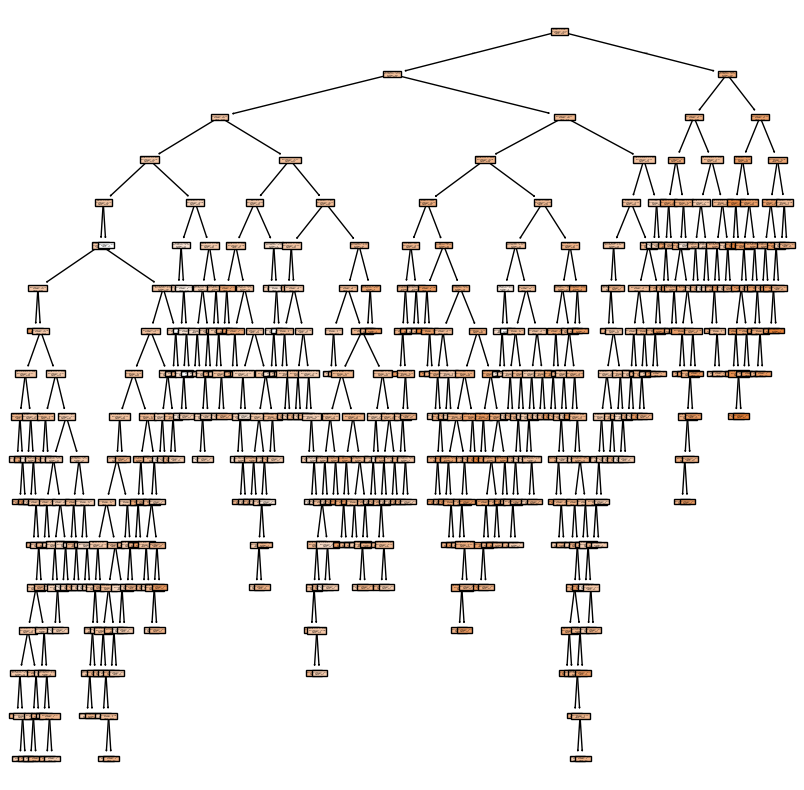

In [92]:
# Plot structure of tree (~10s in current iteration)
plt.figure(figsize=(10,10))
plot_tree(rf.estimators_[0], feature_names=df_red_ev.columns, filled=True)
plt.show()

In [93]:
# Get OOB error and R2 score
print("OOB error:", rf.oob_score_)
print("R2 score:", rf.score(df_red_ev_scaled, df_red_quality))

OOB error: 0.4985192896081798
R2 score: 0.9305608105869941


## Question 7

In [ ]:
# TODO